<a href="https://www.kaggle.com/code/yunusemreakca/onlineretaildataseteda?scriptVersionId=223571627" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import missingno as msno

In [9]:
!pip install missingno

# Story of DataSet (Veri Seti Hikayesi)
InvoiceNo : Her bir sipariş için benzersiz 6 haneli bir kimlik numarasıdır . Eğer numara "c" harfi ile başlıyorsa bu  siparişin iptal olduğunu belirtir. <br>
StockCode : Her bir ürün için benzersiz 5 haneli kimlik kod. Aynı ürün farklı siparişlerde aynı kod ile temsil edilir.<br>
Description : Sipariş edilen ürünün açıklamasını içerir.<br>
Quantity : Sipariş edilen ürünün miktarını ifade eder.<br>
InvioceDate : Siparişin oluşturulduğu tarih ve zaman bilgisini içerir. Format: Yıl/Ay/Gün Saat:Dakika.<br>
UnitPrice : Ürün başına birim fiyatı (para birimi : Sterlin).Miktar ve toplam sipariş değerini hesaplamak için kullanılabilir. <br>
CustomerID : Her bir müşteri için benzersiz 5 haneli kimlik numarası.<br>
Country : Müşterinin ikamet ettiği ülkeyi belirtir.

In [10]:
data = pd.read_csv("/kaggle/input/onlineretail/OnlineRetail.csv",encoding = "ISO-8859-1")

# Negatif Değeler

In [11]:
negative_or_zero_quantity = data[data["Quantity"] <= 0]
print("Negatif veya sıfır Quantity değerleri:")
print(negative_or_zero_quantity)

negative_or_zero_unitprice = data[data["UnitPrice"] <= 0]
print("Negatif veya sıfır UnitPrice değerleri:")
print(negative_or_zero_unitprice)

Negatif veya sıfır Quantity değerleri:
       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country  
141    

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Negatif veya Sıfır Quantity (Miktar):

Bu durum, büyük olasılıkla iade edilen ürünleri (negatif değerler) temsil ediyor.

Negatif veya Sıfır UnitPrice (Birim Fiyat):

Sıfır fiyatlar genellikle ücretsiz ürünler veya yanlış kayıtları ifade edebilir.
Negatif fiyatlar ise anlamlı olmayan veya hatalı değerler olabilir.

In [12]:
data['Return'] = data['Quantity'] < 0

In [13]:
data['FreeOrError'] = data['UnitPrice'] <= 0

In [14]:
cleaned_data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [15]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Return,FreeOrError
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,False,False
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,False,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,False,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,False,False
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,False,False
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,False,False
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,False,False
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,False,False
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,False,False


In [16]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Return              0
FreeOrError         0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Return       541909 non-null  bool   
 9   FreeOrError  541909 non-null  bool   
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 34.1+ MB


In [18]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Return', 'FreeOrError'],
      dtype='object')

## Visualization of Incomplete Data (Eksik Verileri Görselleştirme)

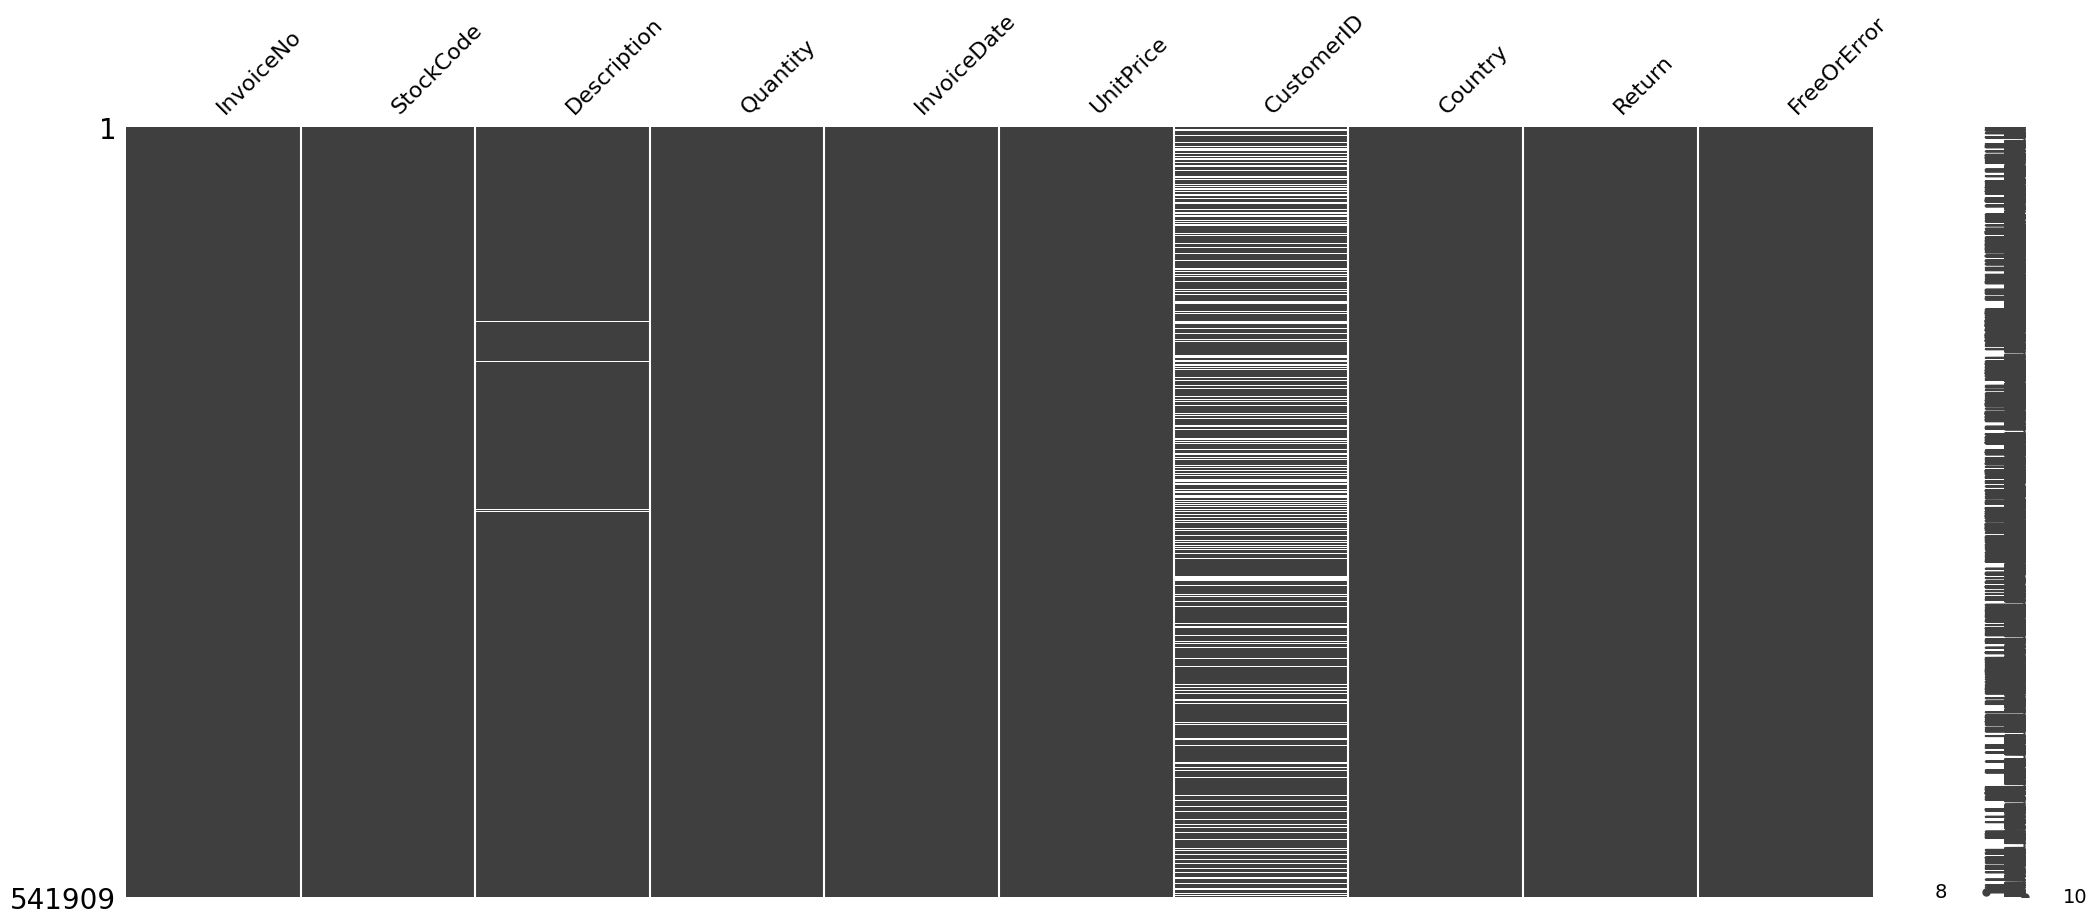

In [19]:
msno.matrix(data);

## Incomplete Data(Eksik Veri)

Benzersiz kimliğe sahip CustomerID sutun'unu değer atama yöntemlerini kullanmak veri setinin doğruluğunu bozacağı için aykırı değer tespitinde bu NaN değerleri ilave etmedik. 

In [20]:
data2 = data.dropna(subset = ["CustomerID"])

## Outlier Detection (Aykırı Gözlem) 

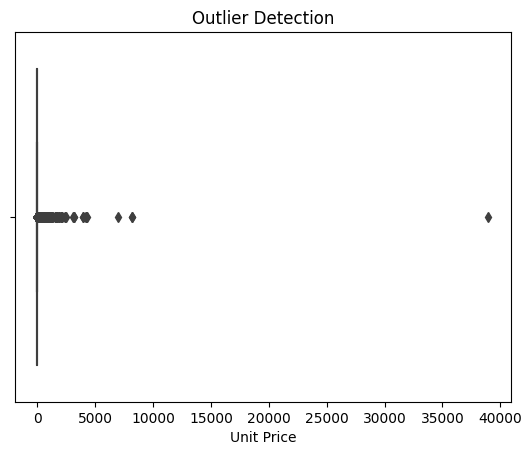

In [21]:
sns.boxplot(data = data2 , x ="UnitPrice")
plt.xlabel("Unit Price")
plt.title("Outlier Detection")
plt.show()

In [22]:
df = data2.select_dtypes(include = ["int64","float64"])

In [23]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [24]:
clf.fit_predict(df)

array([ 1,  1, -1, ...,  1,  1,  1])

In [25]:
df_scores = clf.negative_outlier_factor_

In [26]:
np.sort(df_scores)[0:120] # eşik değerimiz  -1.12423181e+11

array([-7.05047869e+11, -6.72519589e+11, -6.60280238e+11, -5.77789936e+11,
       -2.74196926e+11, -2.47535013e+11, -2.43432520e+11, -2.20356627e+11,
       -2.06158918e+11, -1.92382900e+11, -1.88100000e+11, -1.82892079e+11,
       -1.80450000e+11, -1.80450000e+11, -1.65238605e+11, -1.60371181e+11,
       -1.59508197e+11, -1.57192441e+11, -1.57192441e+11, -1.57192441e+11,
       -1.57192441e+11, -1.55352325e+11, -1.51121824e+11, -1.47953006e+11,
       -1.47953006e+11, -1.47953006e+11, -1.43868503e+11, -1.40000875e+11,
       -1.37885651e+11, -1.37885651e+11, -1.37885651e+11, -1.37885651e+11,
       -1.26913100e+11, -1.26131149e+11, -1.20242078e+11, -1.15528617e+11,
       -1.12622481e+11, -1.12622481e+11, -1.12423181e+11, -9.48691649e+10,
       -9.48691649e+10, -9.40534303e+10, -9.32737710e+10, -9.09648136e+10,
       -8.98797111e+10, -8.98797111e+10, -8.98797111e+10, -8.97537998e+10,
       -8.67077210e+10, -8.67077210e+10, -8.67077210e+10, -8.67077210e+10,
       -8.57601889e+10, -

In [27]:
threshold_value = np.sort(df_scores)[38]

In [28]:
threshold_value

-112423180734.99126

In [29]:
contrary_values = df_scores > threshold_value

In [30]:
contrary_values

array([ True,  True,  True, ...,  True,  True,  True])

## Baskılama Yöntemi

In [31]:
df[df_scores == threshold_value]

,Quantity,UnitPrice,CustomerID
166517,100,4.15,16163.0


In [32]:
baski_deger = df[df_scores == threshold_value]

In [33]:
contraries = df[~contrary_values]

In [34]:
contraries

,Quantity,UnitPrice,CustomerID
7747,120,2.10,16168.0
20016,1,50.00,14932.0
44215,216,3.39,15769.0
44216,216,3.39,15769.0
115973,200,0.75,14603.0
149887,1,125.00,14924.0
154468,1,50.00,14931.0
166517,100,4.15,16163.0
171179,2,145.00,14973.0
182180,200,1.65,15797.0


In [35]:
res = contraries.to_records(index = False)
# Aykırı değerleri eşik değere çevirirken index problemi yaşanmasın diye indexi sildik

In [36]:
res[:] = baski_deger.to_records(index = False)

In [37]:
res

rec.array([(100, 4.15, 16163.), (100, 4.15, 16163.), (100, 4.15, 16163.),
           (100, 4.15, 16163.), (100, 4.15, 16163.), (100, 4.15, 16163.),
           (100, 4.15, 16163.), (100, 4.15, 16163.), (100, 4.15, 16163.),
           (100, 4.15, 16163.), (100, 4.15, 16163.), (100, 4.15, 16163.),
           (100, 4.15, 16163.), (100, 4.15, 16163.), (100, 4.15, 16163.),
           (100, 4.15, 16163.), (100, 4.15, 16163.), (100, 4.15, 16163.),
           (100, 4.15, 16163.), (100, 4.15, 16163.), (100, 4.15, 16163.),
           (100, 4.15, 16163.), (100, 4.15, 16163.), (100, 4.15, 16163.),
           (100, 4.15, 16163.), (100, 4.15, 16163.), (100, 4.15, 16163.),
           (100, 4.15, 16163.), (100, 4.15, 16163.), (100, 4.15, 16163.),
           (100, 4.15, 16163.), (100, 4.15, 16163.), (100, 4.15, 16163.),
           (100, 4.15, 16163.), (100, 4.15, 16163.), (100, 4.15, 16163.),
           (100, 4.15, 16163.), (100, 4.15, 16163.), (100, 4.15, 16163.)],
          dtype=[('Quantity', '<i8'),

In [38]:
df[~contrary_values] = pd.DataFrame(res,index = df[~contrary_values].index)

In [39]:
df[~contrary_values] 

,Quantity,UnitPrice,CustomerID
7747,100,4.15,16163.0
20016,100,4.15,16163.0
44215,100,4.15,16163.0
44216,100,4.15,16163.0
115973,100,4.15,16163.0
149887,100,4.15,16163.0
154468,100,4.15,16163.0
166517,100,4.15,16163.0
171179,100,4.15,16163.0
182180,100,4.15,16163.0


# Categorical Variable Summary (Kategorik Değişken  Özeti)

In [40]:
cat_df= data.select_dtypes(include = ["object"])

In [41]:
cat_df.head()

,InvoiceNo,StockCode,Description,InvoiceDate,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,United Kingdom
1,536365,71053,WHITE METAL LANTERN,12/1/2010 8:26,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,United Kingdom


In [42]:
cat_df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [43]:
cat_df["Country"].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


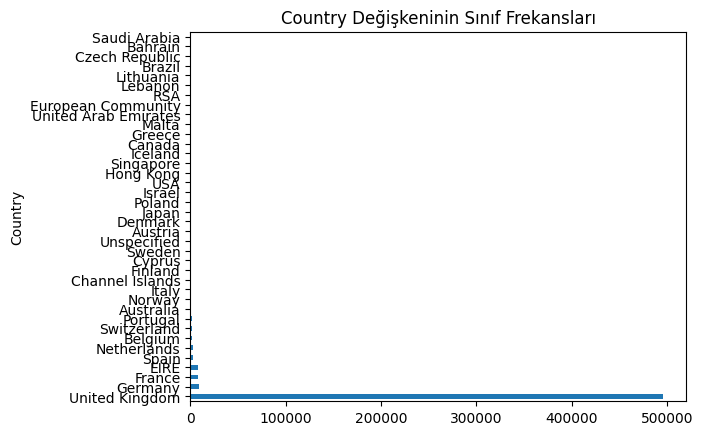

In [44]:
data["Country"].value_counts().plot.barh().set_title("Country Değişkeninin Sınıf Frekansları");

# Histogram

In [45]:
cleaned_data["TotalPrice"] = cleaned_data["UnitPrice"] * cleaned_data["Quantity"]

<ipython-input-45-f742b8a01704>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["TotalPrice"] = cleaned_data["UnitPrice"] * cleaned_data["Quantity"]


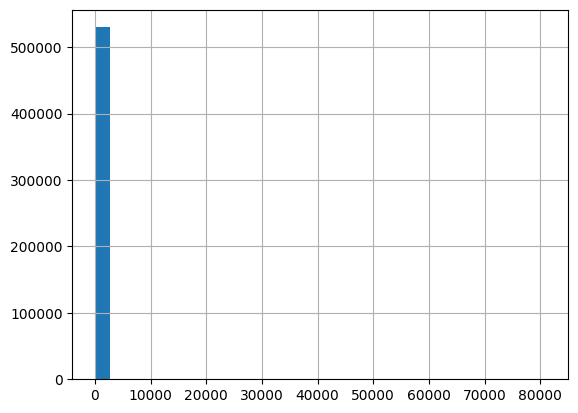

In [46]:
cleaned_data["Quantity"].hist(bins = 30);

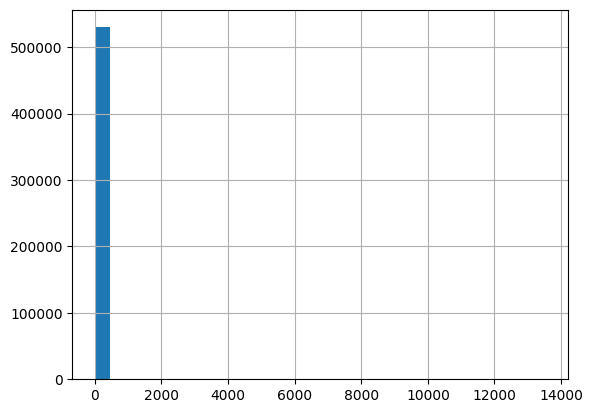

In [47]:
cleaned_data['UnitPrice'].hist(bins=30);

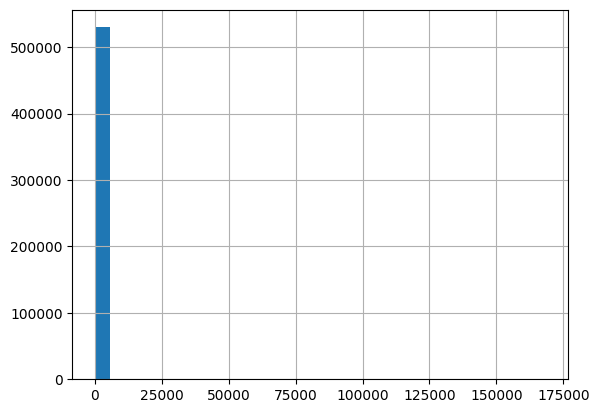

In [48]:
cleaned_data['TotalPrice'].hist(bins=30);

# Correlation Analysis (Korelasyon Analizi)

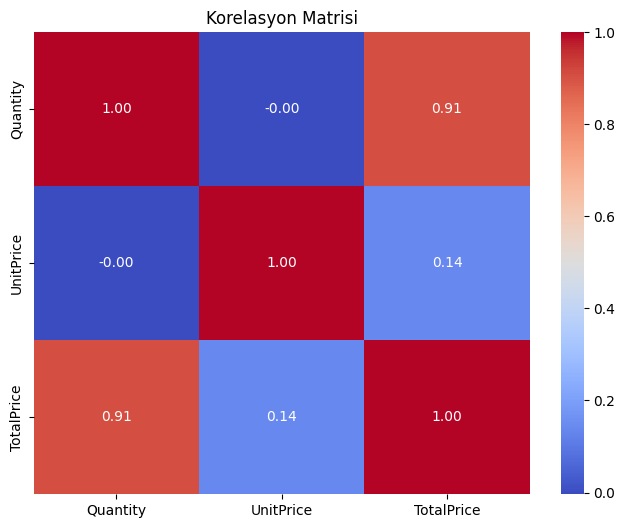

In [49]:
numeric_cols = ['Quantity', 'UnitPrice', 'TotalPrice']
corr_matrix = cleaned_data[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

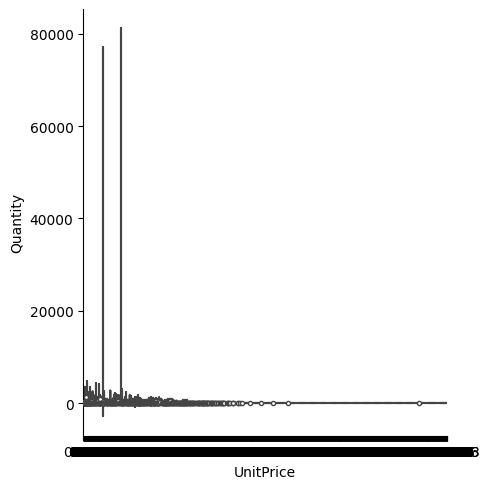

In [50]:
sns.catplot(x ="UnitPrice",y= "Quantity",kind = "violin",data=cleaned_data);

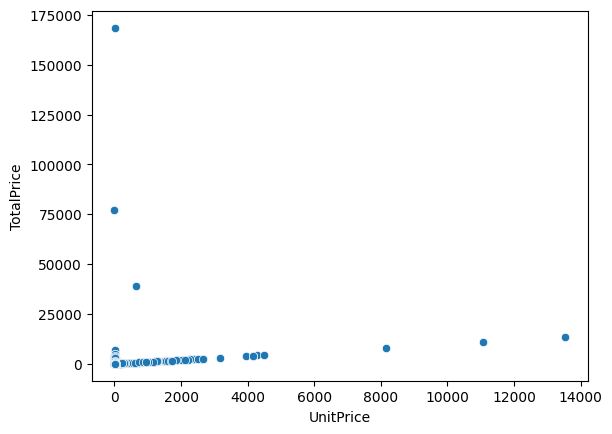

In [51]:
sns.scatterplot(x=cleaned_data['UnitPrice'], y=cleaned_data['TotalPrice']);

# Hangi Aylarda Daha fazla Satış Yapılmış ? 

In [52]:
cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'])

<ipython-input-52-c88ea6635b0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'])


In [53]:
cleaned_data['Month'] = cleaned_data['InvoiceDate'].dt.month

<ipython-input-53-17ec41e107f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Month'] = cleaned_data['InvoiceDate'].dt.month


<Axes: xlabel='Month'>

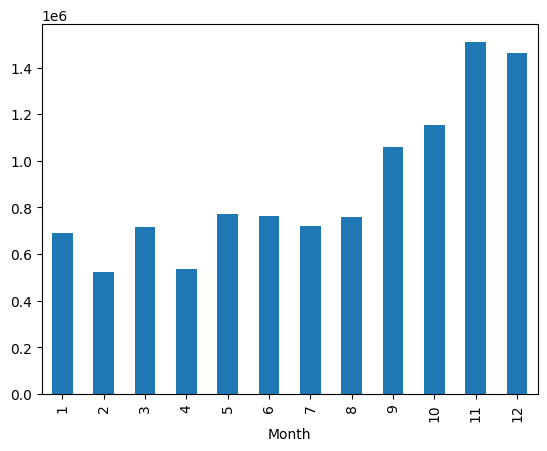

In [54]:
cleaned_data.groupby("Month")["TotalPrice"].sum().plot(kind='bar')

* Grafikten Görüldüğü Üzere sonbahar aylarında en çok satış gerçekleşmiş.
* Belki bu aylarda bir indirim dönemi olabilir.


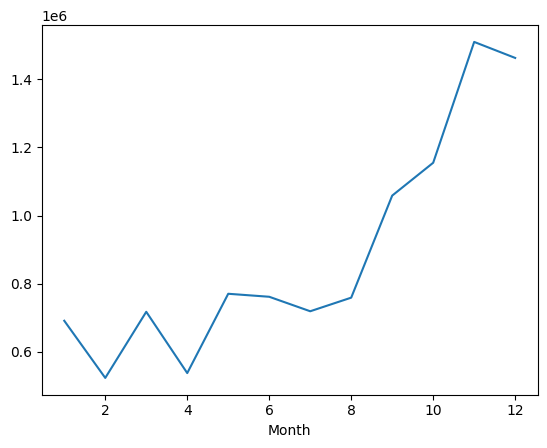

In [55]:
cleaned_data.groupby('Month')['TotalPrice'].sum().plot(kind='line');

* Bu grafikten Görülebileceği üzere en çok satın alımlar sonbahar aylarında olmuştur.

# En Çok Satılan Ürünler 

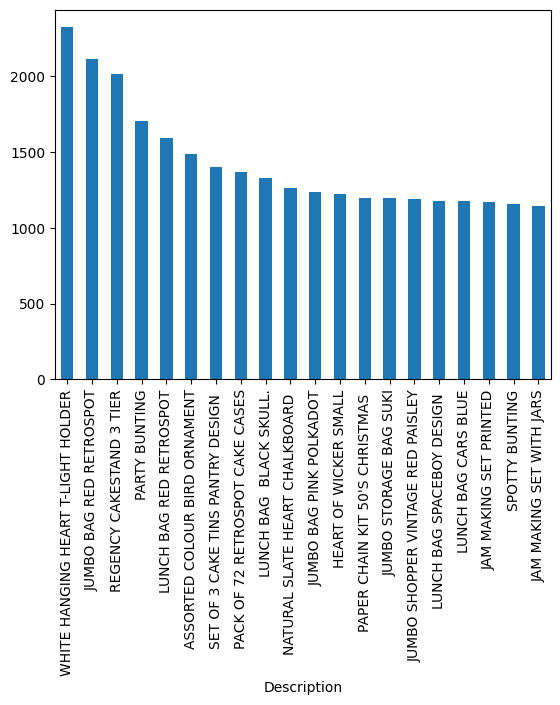

In [56]:
cleaned_data["Description"].value_counts().head(20).plot(kind="bar");

* En çok satılan ürünleri grafikten inceleyebiliriz.
* Bu ürünlere göre farklı fikirler geliştirip ,müşterinin daha fazla almasını sağlayabiliriz.
* Çapraz satış (set halinde satma) gibi indirimler gerçekleştirebiliriz.